In [1]:
# Linear Regression (OLS) - bootstrap

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)


In [2]:
# Make data set.

n = 100

x = np.linspace(-3, 3, n)
yt=np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
y = yt + 1.0*np.random.normal(0, 0.1, x.shape)

# transforming the data to include another axis
X = x[:, np.newaxis]
y = y[:, np.newaxis]


In [3]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [4]:
#----------------------------------------------
#           Linear Regression (OLS)            #
#----------------------------------------------


n_bootstraps = 100
maxdegree = 15

errS = np.zeros(maxdegree)
errS2 = np.zeros(maxdegree)
varianceS = np.zeros(maxdegree)

mse = np.zeros(maxdegree)
mse2 = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

for degree in range(maxdegree):
    
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    y_pred2 = np.empty((y_train.shape[0], n_bootstraps))

    for i in range(n_bootstraps):
        x_, y_ = resample(X_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(X_test).ravel()
        y_pred2[:, i] = model.fit(x_, y_).predict(X_train).ravel()
        
    # SKl
    errS[degree]=mean_squared_error(y_test, np.mean(y_pred, axis=1))
    errS2[degree]=mean_squared_error(y_train, np.mean(y_pred2, axis=1))
    
    varianceS[degree] = np.mean((y_pred - np.mean(y_pred, axis=1, keepdims=True))**2)
    
    polydegree[degree] = degree
    
    mse[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )   
    mse2[degree] = np.mean( np.mean((y_train - y_pred2)**2, axis=1, keepdims=True) )
    
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
  

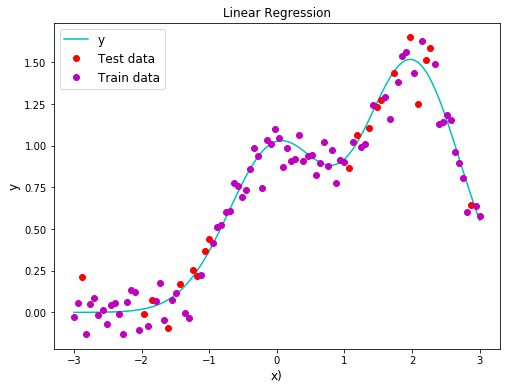

In [5]:
#----------------------------------------------
# Plot

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, yt, 'c', label='y')
ax.plot(X_test, y_test, 'ro', label='Test data')
ax.plot(X_train, y_train, 'mo', label='Train data')
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x)', fontsize=12)
ax.legend(fontsize=12)
plt.title('Linear Regression')
plt.savefig('x-y_sampleData.png')
plt.show()

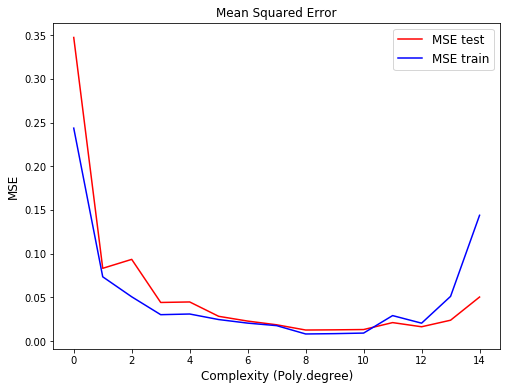

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(polydegree, mse, 'r', label='MSE test')
ax.plot(polydegree, mse2, 'b', label='MSE train')

ax.set_ylabel('MSE', fontsize=12)
ax.set_xlabel('Complexity (Poly.degree)', fontsize=12)
ax.legend(fontsize=12)
plt.title('Mean Squared Error')
plt.savefig('train_test_MSE.png')
plt.show()

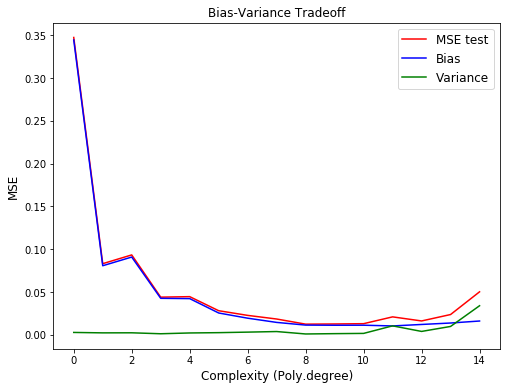

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(polydegree, mse, 'r', label='MSE test')
ax.plot(polydegree, bias, 'b', label='Bias')
ax.plot(polydegree, variance, 'g', label='Variance')

ax.set_ylabel('MSE', fontsize=12)
ax.set_xlabel('Complexity (Poly.degree)', fontsize=12)
ax.legend(fontsize=12)
plt.title('Bias-Variance Tradeoff')
plt.savefig('bias_variance_tradeoff.png')
plt.show()